In [1]:
#importing Libraries
import sympy as sp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy import exp
from numpy import sin 
from numpy import cos 
import math as m
import warnings
warnings.filterwarnings('ignore')
from math import pi
import cmath
%matplotlib inline

### 1.
Consider a periodic square wave with time period T = 2 seconds having
magnitude 1 between t = 0 s and t = 1 s and zero elsewhere. Let g(t) be
the Fourier series representation of the square wave.

In [25]:
t=np.linspace(0,8,400)
rec=[]
for i in (t):
    if ((int(i)%2)==0):
        rec.append(1)
    else:
        rec.append(0)

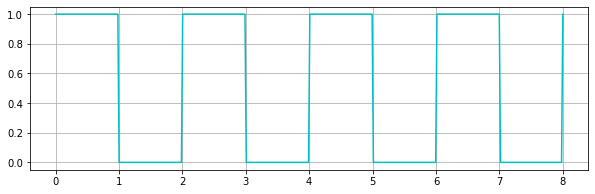

In [3]:
plt.figure(figsize=(10,3))
plt.plot(t,rec,"c")
plt.grid()

Let g(t) be the Fourier series representation of the square wave

(a) Define a function so that you can easily plot g(t) for different num-
bers of coefficients on the same graph. This plot is useful to see the
emergence of the square wave as the number of terms in the repre-
sentation increases.

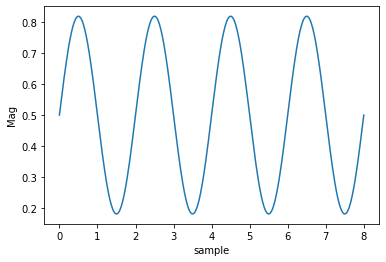

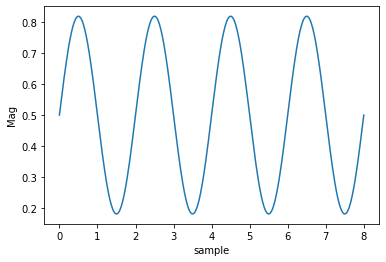

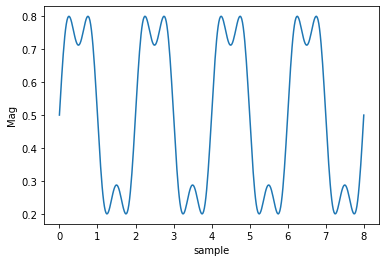

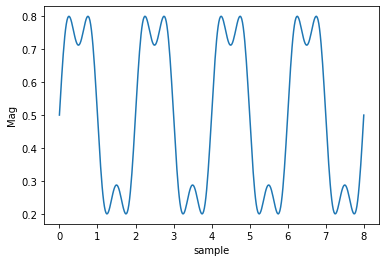

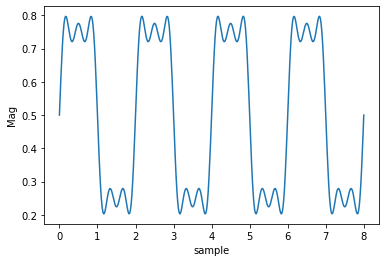

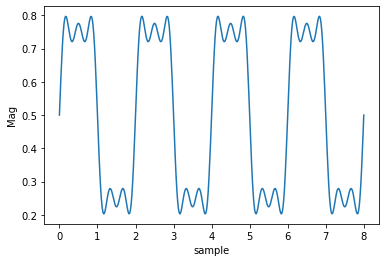

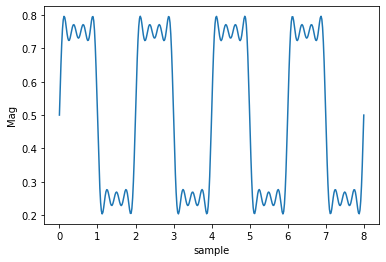

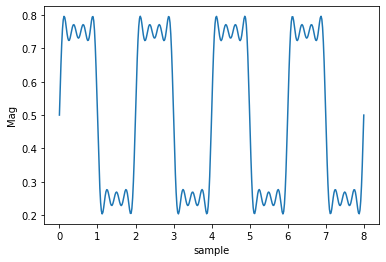

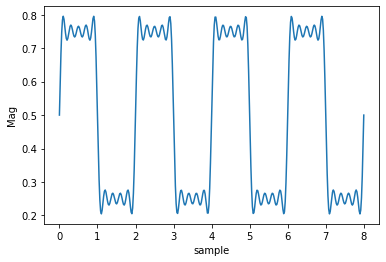

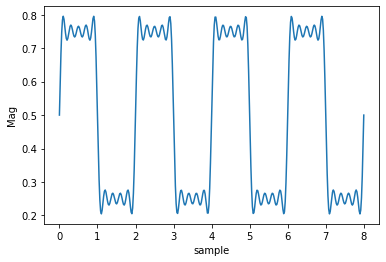

In [4]:
def fourier(N):
    D = 0.5 
    for n in range(1,N+1):
        a = (np.exp(-1j*n*pi/2)/(n*pi))*sin(n*pi/2)
        D =D+ a*(np.exp(1j*n*pi*t))
    plt.figure()
    plt.xlabel("sample")
    plt.ylabel("Mag")
    plt.plot(t,D)

for i in range(10):
    fourier(i+1)

What happens to the Gibbs phenomenon when the number of
terms becomes large?

### Gibbs Phenomenon
The Gibbs phenomenon involves both the fact that Fourier sums overshoot at a jump discontinuity, and that this overshoot does not die out as more terms are added to the sum.

# 2) 
A signal is given as x(t) = cos2ft where f = 30 Hz. The signal is
sampled at 100 times per second for 0.99 seconds and then its DFT is
computed.

In [5]:
def DFT(Xn,N):     #defining the DFT
    Xk_coeff=[]    #to store the result coeff
    for k in range (N):
        p=0
        for i in range(N):
            p=p+Xn[i]*exp((-2j*pi/N)*k*i)
        Xk_coeff.append(p)
    return Xk_coeff
def IDFT(Xk_coeff,N):     #defining the IDFT
    Xn=[]
    for i in range (N):
        p=0
        for k in range(len(Xk_coeff)):
            p=p+Xk_coeff[k]*exp((2j*pi/N)*k*i)
        Xn.append(p)
    return (np.array(Xn)/N)

Text(0, 0.5, 'coeff amplitude')

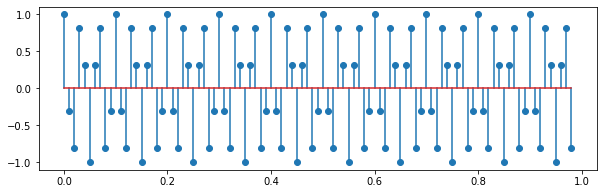

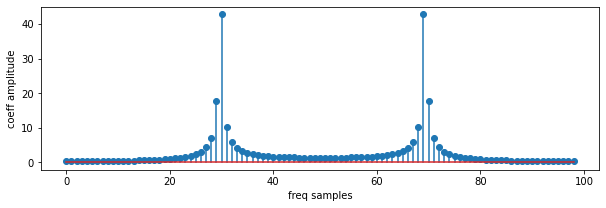

In [6]:
%matplotlib inline

f=30
Fs=100
Ts=(1/Fs)
N=99     #no of samples we are liekly to get
t=np.arange(0,0.99,Ts)    #so T being the sampling period, (N+1),upper bound is ignored usually
X=cos(2*pi*f*t)


plt.figure(figsize=(10,3))
plt.stem(t,X)


plt.figure(figsize=(10,3))
Xk=DFT(X,len(X))
plt.stem(np.abs(Xk))
plt.xlabel("freq samples")
plt.ylabel("coeff amplitude")

we are having the spectral leakage here, beacuse of improper sampling. for exaomle
if we would have sampled it for whole 1 second instead of the 0.99 second, we would have 
a proper two sample 

<StemContainer object of 3 artists>

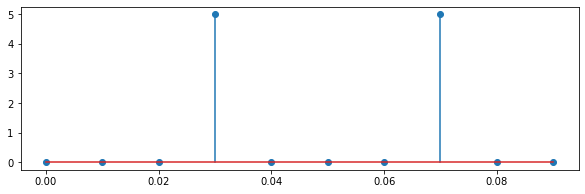

In [7]:
t=np.arange(0,0.1,Ts)    #so T being the sampling period, (N+1),upper bound is ignored usually
X_perf=cos(2*pi*f*t)

plt.figure(figsize=(10,3))
plt.stem(t,DFT(X,len(X_perf)))

(b) Using various window functions such as Hanning, Hamming, Bartlett
etc. try to minimize the Spectral Leakage. Show the plots in each
case.

### 1) Hanning

In [8]:
def hanning_wind(k):
    Hann=[]
    for i in range(k):
        Hann.append(0.5*(1-1*np.cos( (2*np.pi*i)/(k-1) )))
    return np.array(Hann)

Text(0, 0.5, 'amplitude')

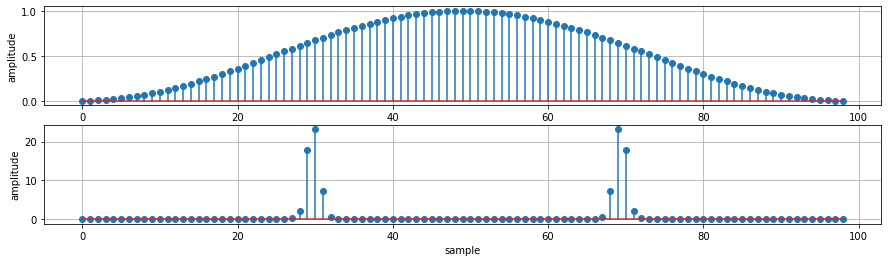

In [9]:
plt.figure(figsize=(15,4))
hann=hanning_wind(len(X))

plt.subplot(2,1,1)
plt.grid()
plt.stem(hann)
plt.xlabel("sample")
plt.ylabel("amplitude")

plt.subplot(2,1,2)
plt.grid()
plt.stem(abs(np.array((DFT((np.multiply(X,hann)),len(X))))))
plt.xlabel("sample")
plt.ylabel("amplitude")

In [10]:
def hamming_wind(k): # returns a hamming window
    Hamm=[]
    for i in range(k):
        Hamm.append(0.54-0.46*np.cos( (2*np.pi*i)/(k-1) ))
    return np.array(Hamm)

Text(0, 0.5, 'amplitude')

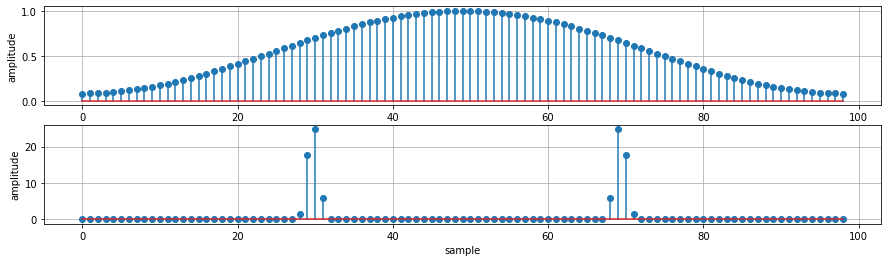

In [11]:
plt.figure(figsize=(15,4))
hamm=hamming_wind(len(X))

plt.subplot(2,1,1)
plt.grid()
plt.stem(hamm)
plt.xlabel("sample")
plt.ylabel("amplitude")

plt.subplot(2,1,2)
plt.grid()
plt.stem(abs(np.array((DFT((np.multiply(X,hamm)),len(X))))))
plt.xlabel("sample")
plt.ylabel("amplitude")

In [12]:
def bartlett_wind(k): # returns a bartlett window
    Barl=[]
    for i in range(k):
        Barl.append( (1/((k-1)/2)*(((k-1)/2)-abs(i-((k-1)/2)))))
    return np.array(Barl)

Text(0, 0.5, 'amplitude')

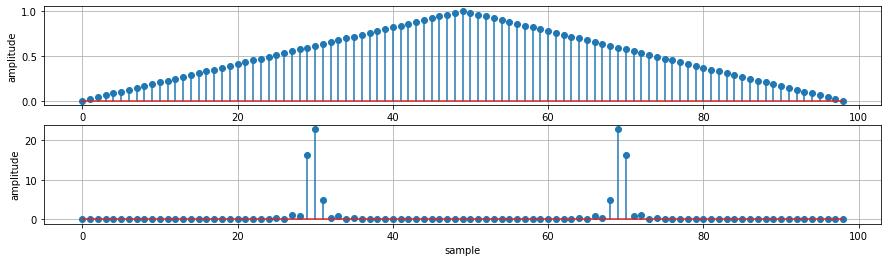

In [13]:
plt.figure(figsize=(15,4))
barl=bartlett_wind(len(X))


plt.subplot(2,1,1)
plt.grid()
plt.stem(barl)
plt.xlabel("sample")
plt.ylabel("amplitude")

plt.subplot(2,1,2)
plt.grid()
plt.stem(abs(np.array((DFT((np.multiply(X,barl)),len(X))))))
plt.xlabel("sample")
plt.ylabel("amplitude")

3. Consider the signal x(t) = cos(2f1t) + cos(2f2t) where f1 = 10 Hz and
f2 = 30 Hz. The signal y(t) is the noisy version of x(t) when x(t) is
corrupted with white noise having zero mean and unit variance.

In [14]:
t=np.linspace(0,8,801)

<StemContainer object of 3 artists>

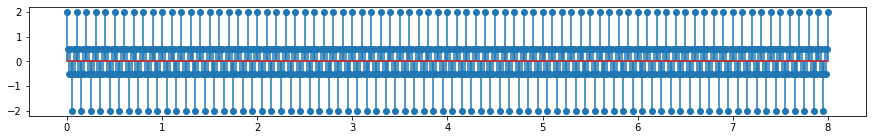

In [15]:
plt.figure(figsize=(15,2))
f1=10
f2=30

signal=cos(2*pi*f1*t)+cos(2*pi*f2*t)
plt.stem(t,signal)

In [16]:
#generating noise

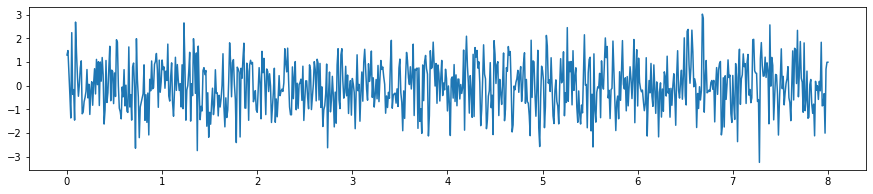

In [17]:
mue=0
var=1
plt.figure(figsize=(15,3))
white_noise = np.random.normal(mue, var, size=801)
plt.plot(t,white_noise)

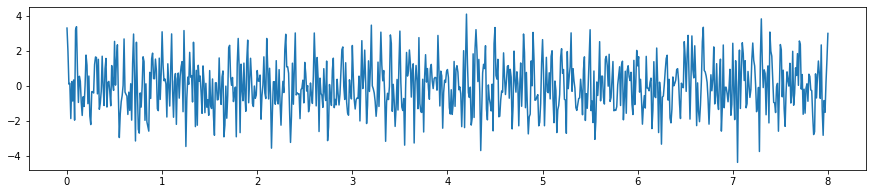

In [18]:
plt.figure(figsize=(15,3))

noisy_sig=signal+white_noise
plt.plot(t,noisy_sig)

(b) From the PSD, find a suitable threshold for denoising the signal.

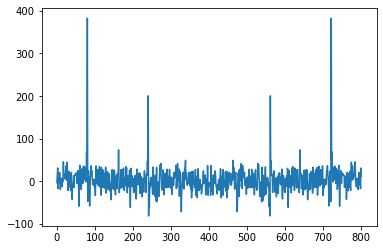

In [19]:
Xk=DFT(noisy_sig,len(noisy_sig))
plt.plot(Xk)

In [20]:
threshold=(abs(max(DFT(white_noise,len(white_noise))))/abs(max(Xk)))*100

In [21]:
print("to filter out the white noise we need ",threshold,"% of max level of noisy signal")

to filter out the white noise we need  18.41465492084937 % of max level of noisy signal


(c) Recover x(t) from y(t) using the threshold. Show the necessary plots.

In [22]:
Xk=np.array(Xk)
for i in range(801):
    if(Xk[i]<=(threshold)*abs(max(Xk))/100):
        Xk[i]=0

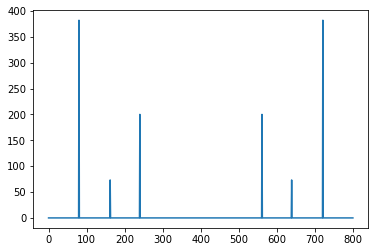

In [23]:
plt.plot(Xk)

<StemContainer object of 3 artists>

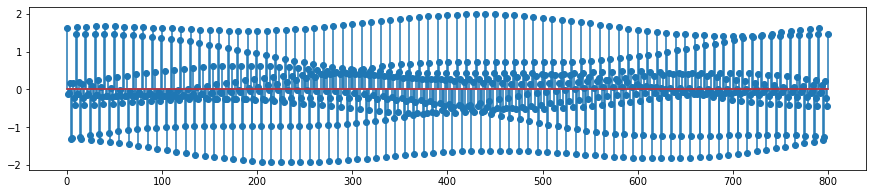

In [24]:
plt.figure(figsize=(15,3))
plt.stem(IDFT(Xk,len(Xk)))